# **Resume Screening**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('UpdatedResumeDataSet.csv', engine='python')

In [5]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
df.shape

(962, 2)

In [7]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [9]:
df['Category'].nunique()

25

In [10]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


**Data Preprocessing and EDA**

<function matplotlib.pyplot.show(close=None, block=None)>

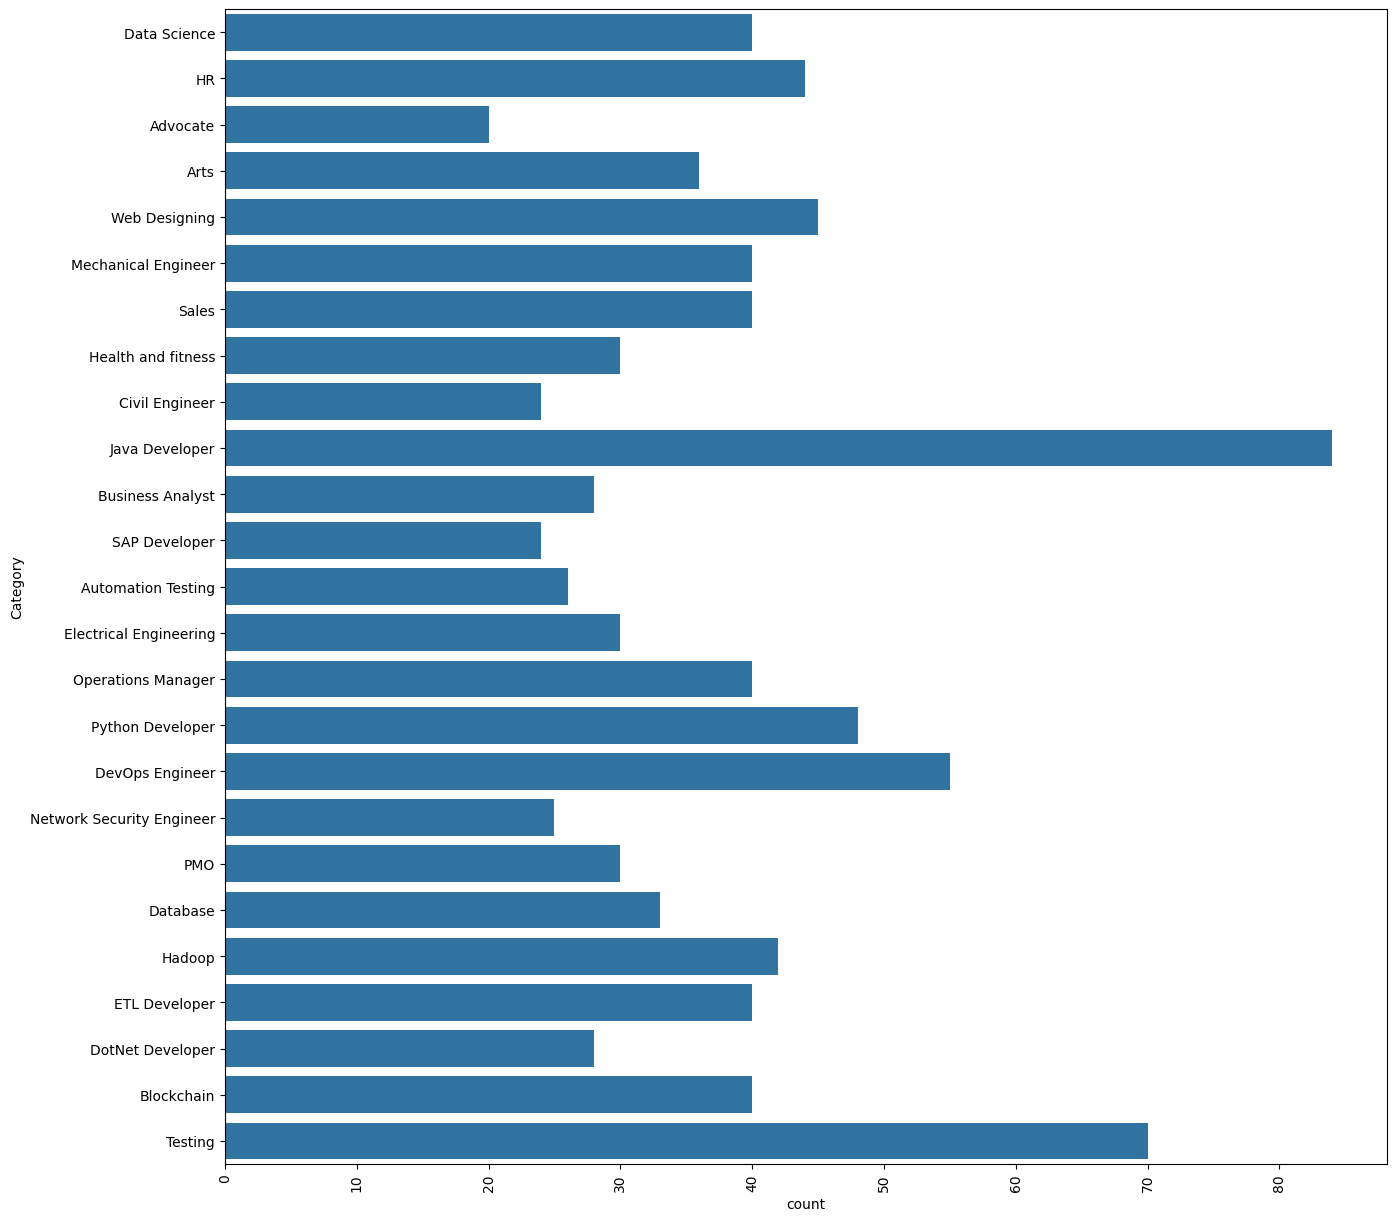

In [11]:
plt.figure(figsize=(15,15))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show

In [12]:
df['Category']

,Category
0,Data Science
1,Data Science
2,Data Science
3,Data Science
4,Data Science
...,...
957,Testing
958,Testing
959,Testing
960,Testing


In [18]:
df['Category'][0]

'Data Science'

In [19]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [20]:
import re

def CleanResume(txt):
    Cleantxt = re.sub('https\\S+\\s', ' ', txt)
    Cleantxt = re.sub('\\s+', ' ', Cleantxt)
    Cleantxt = re.sub('#\\S+\\s', ' ', Cleantxt)
    Cleantxt = re.sub('@\\S+\\s', ' ', Cleantxt)
    Cleantxt = re.sub('[%s]' % re.escape("""!"&#$@^()':<>?|*{/}][,._+=-~`'"""), ' ', Cleantxt)
    Cleantxt = re.sub('RT|cc', ' ', Cleantxt)
    Cleantxt = Cleantxt.lower()

    return Cleantxt

In [21]:
CleanResume("HEy https:\\sdjjkdld.com zainab\n \r @gmail.com #zainab ### hyeihkks")

'hey zainab    hyeihkks'

In [22]:
df['Resume'] = df['Resume'].apply(lambda x: CleanResume(x))

In [23]:
df['Resume'][0]

'skills   programming languages  python  pandas  numpy  scipy  scikit learn  matplotlib   sql  java  javascript jquery    machine learning  regression  svm  naã¯ve bayes  knn  random forest  decision trees  boosting techniques  cluster analysis  word embedding  sentiment analysis  natural language processing  dimensionality reduction  topic modelling  lda  nmf   pca   neural nets    database visualizations  mysql  sqlserver  cassandra  hbase  elasticsearch d3 js  dc js  plotly  kibana  matplotlib  ggplot  tableau    others  regular expression  html  css  angular 6  logstash  kafka  python flask  git  docker  computer vision   open cv and understanding of deep learning education details data science assurance associate data science assurance associate   ernst   young llp skill details javascript  exprience   24 months jquery  exprience   24 months python  exprience   24 monthscompany details company   ernst   young llp description   fraud investigations and dispute services assurance te

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [26]:
df['Category']

,Category
0,6
1,6
2,6
3,6
4,6
...,...
957,23
958,23
959,23
960,23


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
RequiredText = tfidf.transform(df['Resume'])

In [29]:
df.head()

,Category,Resume
0,6,skills programming languages python pandas...
1,6,education details may 2013 to may 2017 b e uit...
2,6,areas of interest deep learning control syste...
3,6,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,6,education details mca ymcaust faridabad hary...


**Model Building**

In [30]:
from sklearn.model_selection import train_test_split
x = RequiredText
y = df['Category']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape

(769, 7385)

In [33]:
X_test.shape

(193, 7385)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

dtree = OneVsRestClassifier(DecisionTreeClassifier())
dtree.fit(X_train, y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [35]:
dtree_ypred = dtree.predict(X_test)
print(accuracy_score(y_test, dtree_ypred))

0.9948186528497409


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtree_ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
          17       1.00    

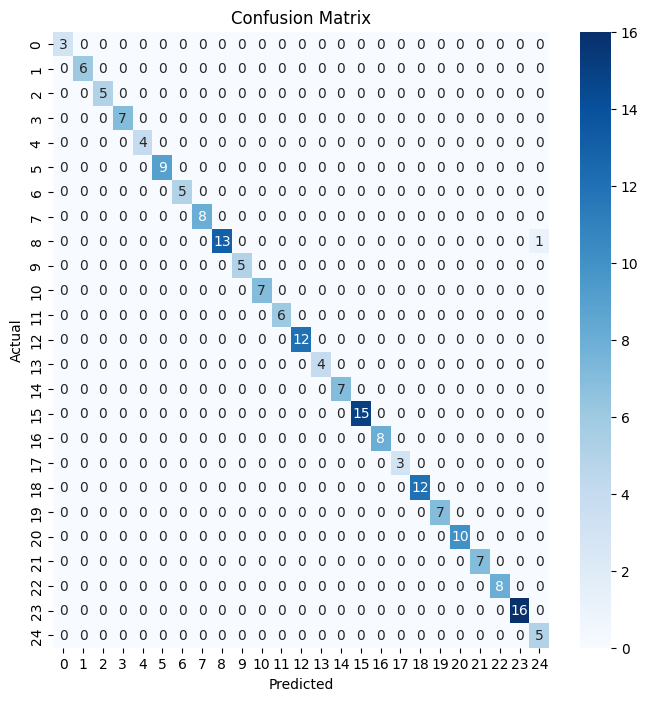

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, dtree_ypred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Realtime Pipeline**

In [46]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl', 'wb'))
pickle.dump(dtree,open('dtree.pkl', 'wb'))

In [47]:
my_resume = """Innovative graduate with a degree in Information Technology seeking an entry-level position to
utilise analytical and quantitative modelling skills with proficiency in data manipulation and
visualisation tools. Eager to show my abilities to support data-driven decision-making and
contribute to continued success.
WORK EXPERIENCE
June 2024 Data Science Intern, BlackCoffer
- Performed data cleaning, preprocessing, and feature engineering tasks.
- Developed and implemented machine learning models for predictive analysis using Python
and scikit-learn.
- Conducted EDA and visualized data using libraries like Matplotlib and Seaborn.
- Collaborated with cross-functional teams to understand business requirements and provide
data-driven insights.
EDUCATION
2021 - 2024 Sophia College (Autonomous) Mumbai
University of Mumbai
Bachelor of Science in Information Technology
CGPA – 9.87
TECHNICAL SKILLS
- Proficient in Programming Languages: SQL, Python, R.
- Data Science Libraries: Numpy, Pandas, Matplotlib, NLP Libraries, Scikit-Learn.
- Familiar with ML frameworks: PyTorch, TensorFlow, Keras.
- Platforms: Pycharm, Vs Code, Google Colab, Jupyter Notebook, Github.
- Data Visualisation Tools: Excel, Google Sheets,Tableau, Power BI, PowerPoint.
- Data Collection, Transformation, Cleaning and Manipulation, Preprocessing.
- Data models, AI, NLP, Machine Learning and Deep Learning.
- Statistical analysis and modelling techniques, ETL Process.
- Strong analytical and communication skills.
- Ability to work collaboratively in a team environment.
PROJECTS → [LINK]
2024 Sarcasm Sniffer – Sarcasm Detection Web Application
Gathered and prepped real-time data from twitter and available dataset from kaggle.
Created a LSTM and Logistic Regression model on Google colab, combining desperate
sources into a projection that outperformed with the accuracy of 0.754 &0.893 respectively.
A project, address the challenge of sarcasm detection within textual data, focusing on the
context-rich environment of tweets, build on pycharm using Flask web framework.
2024 Malaria Detection
Malaria is an infectious disease that causes over 400,000 deaths per year. I have gathered
the data from an open source and trained the model by the neural network(CNN) to identify
the parasite and uninfected blood.
CERTIFICATE
Data Analyst Essential, Cisco
Data Science, Cisco
EXTRA CURRICULAR ACTIVITIES
April, 2024 Data Analytics and Visualization Accenture, Virtual Intern
Read and analyze a client project brief to understand the client and business problem, identify
the requirements that need to be delivered, and identify which tasks you need to focus on as a
data analyst"""

In [48]:
import pickle

# Load the trained classifier
clf = pickle.load(open('dtree.pkl', 'rb'))

# Clean the input resume
cleaned_resume = CleanResume(my_resume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = dtree.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)

print(prediction_id)

Predicted Category: Data Science
6


**Deployment**

In [49]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


In [50]:
!wget -q -O - ipv4.icanhazip.com

34.48.112.139


In [58]:
! streamlit run resumeapp.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.112.139:8501

⠼⠴⠦⠧⠇⠏your url is: https://ready-pigs-rule.loca.lt
  Stopping...
^C


In [56]:
import streamlit as st
import pickle
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from docx import Document
import PyPDF2

# Load the trained model and TF-IDF vectorizer
try:
    tfidf = pickle.load(open('tfidf.pkl', 'rb'))
    dtree = pickle.load(open('dtree.pkl', 'rb'))
except FileNotFoundError:
    st.error("Error: Model or TF-IDF vectorizer file not found. Please ensure 'tfidf.pkl' and 'dtree.pkl' are in the same directory.")
    st.stop()

# Define the CleanResume function
def CleanResume(txt):
    Cleantxt = re.sub('https\\S+\\s', ' ', txt)
    Cleantxt = re.sub('\\s+', ' ', Cleantxt)
    Cleantxt = re.sub('#\\S+\\s', ' ', Cleantxt)
    Cleantxt = re.sub('@\\S+\\s', ' ', Cleantxt)
    Cleantxt = re.sub('[%s]' % re.escape("""!"&#$@^()':<>?|*{/}][,._+=-~`'"""), ' ', Cleantxt)
    Cleantxt = re.sub('RT|cc', ' ', Cleantxt)
    Cleantxt = Cleantxt.lower()
    return Cleantxt

# Define the category mapping
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

# Streamlit app title and description
st.title("Resume Category Predictor")
st.write("Upload your resume or paste the text to get a predicted category.")

# Input method selection
input_method = st.radio("Choose input method:", ("Paste Resume Text", "Upload Resume File"))

resume_text = ""

if input_method == "Paste Resume Text":
    resume_text = st.text_area("Paste your resume text here:")
elif input_method == "Upload Resume File":
    uploaded_file = st.file_uploader("Upload a resume file (PDF, TXT, or DOCX)", type=["pdf", "txt", "docx"])
    if uploaded_file is not None:
        file_extension = uploaded_file.name.split('.')[-1].lower()
        if file_extension == 'txt':
            try:
                resume_text = uploaded_file.getvalue().decode("utf-8")
            except UnicodeDecodeError:
                try:
                    resume_text = uploaded_file.getvalue().decode("latin-1")
                except Exception as e:
                     st.error(f"Error reading text file: {e}")

        elif file_extension == 'docx':
            try:
                doc = Document(uploaded_file)
                resume_text = "\n".join([paragraph.text for paragraph in doc.paragraphs])
            except Exception as e:
                st.error(f"Error reading docx file: {e}")
        elif file_extension == 'pdf':
             try:
                reader = PyPDF2.PdfReader(uploaded_file)
                resume_text = ""
                for page_num in range(len(reader.pages)):
                    resume_text += reader.pages[page_num].extract_text()
             except Exception as e:
                st.error(f"Error reading PDF file: {e}")


if st.button("Predict Category", key="predict_button_1") and resume_text:
    # Clean the input resume
    cleaned_resume = CleanResume(resume_text)

    # Transform the cleaned resume using the trained TfidfVectorizer
    input_features = tfidf.transform([cleaned_resume])

    # Make the prediction using the loaded classifier
    prediction_id = dtree.predict(input_features)[0]

    # Map category ID to category name
    category_name = category_mapping.get(prediction_id, "Unknown")

    st.subheader("Predicted Category:")
    st.write(category_name)
elif st.button("Predict Category", key="predict_button_2") and not resume_text:
    st.warning("Please enter or upload a resume to get a prediction.")

2025-07-29 06:05:46.734 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 06:05:46.810 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-29 06:05:46.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 06:05:46.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 06:05:46.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 06:05:46.817 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 06:05:46.818 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 06:05:46.820 Thread 'MainThread': mi

In [53]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 8.0 MB/s eta 0:00:00


In [55]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 13.0 MB/s eta 0:00:00
